# Introduction
Logistic regression is a supervised ML algorithm that is used when the dataset has a target variable that is of categorical type. It performs the task of classification.

The equation of line is used to build the model that performs the task of classification. This divides the plane into 2 parts with each half containing the points belonging to the same class. This description is merely for understanding and is not true (entirely).

# Step Funtion as the Activation Function for Logistic Regression
Step function, also known as a Heaviside function, is a mathematical function that outputs a specific value based on whether the input is less than, equal to, or greater than a certain threshold.

Meaning the function outputs a certain value (usually 0) when input is less than 0, and another value (usually 1) when the input is greater than 0. In other words, the function outputs a constant value (usually 0 or 1) for a certain range of input values.

There is an abrupt transition from one constant to another at a specific value which is set, called as threshold.

Mathematically,

$y = w^T x + w_0$

$y \in (-\infty, \infty)$

$f(y) = {0, 1}$

$f(y) = \begin{cases}1, & \text{if } y \geq 0, \\0, & \text{if } y < 0.\end{cases}$

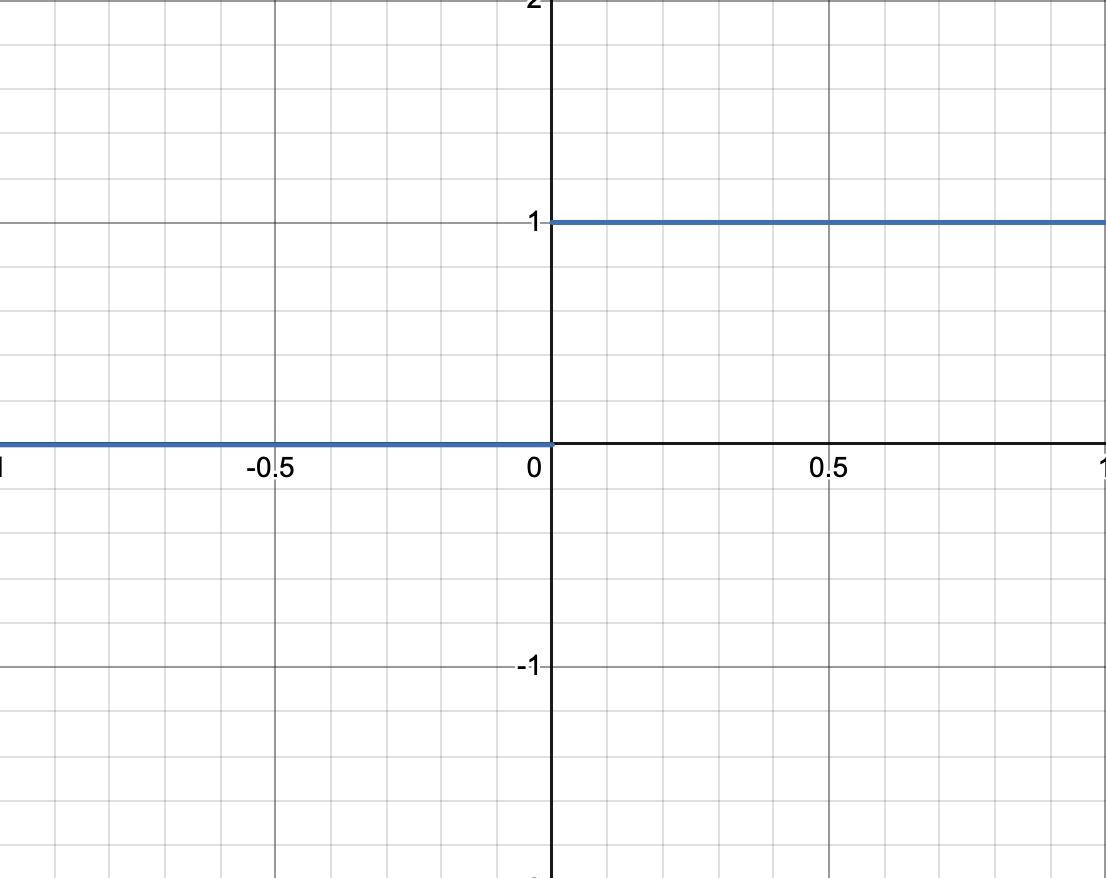

### Limitations of step function
- A step function outputs a 0 or a 1 abruptly, with no values in between. This makes it difficult to model the gradual change in probabilities that logistic regression aims for.
- The step function has a zero gradient everywhere except for the transition point. This is problematic for gradient-based optimization algorithms used to train logistic regression models. Without a smooth gradient, the model wouldn't be able to learn effectively through back-propagation.